<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de Procesos Financieros. 

**Nombres:** Diego Alberto López Lazareno (Estudiante 1) y Esteban Márquez Delgado (Estudiante 2).

**Fecha:** 14 de octubre del 2021.

**Expediente** : IF722100, IF700637.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/diegolazareno/Proyecto_DALopez_EMarquez

# Proyecto TEMA-2

# 1.1 Valuación Intrínseca Probabilista:
## O Cómo Valorar Empresas Financieras Con Simulación Montecarlo

## 1.2 Objetivos

### 1.2.1 Objetivo General

+ Obtener una distribución de probabilidad para el valor intrínseco de las empresas financieras que forman parte del índice S&P $500$.

### 1.2.2 Objetivos Específicos

+ Descargar, con ayuda de la API de Financial Modeling Prep, los fundamentales históricos de las empresas del sector financiero que están listadas en el índice S&P $500$.
+ Obtener la distribución de probabilidad de cada nodo que simularemos a través de la manipulación aritmética de los fundamentales históricos descargados.
+ Generar variables aleatorias que sigan la distribución de probabilidad de su respectivo nodo con las técnicas aprendidas durante el presente curso de *Simulación de Procesos Financieros*.
+ Valorar a determinada(s) empresa(s) del sector financiero a través del *Modelo de Dividendos Descontados*, usando como parámetros de dicho método de valuación intrínseca a las variables aleatorias generadas de cada nodo. Este proceso nos arrojará una distribución de probabilidad para el valor intrínseco de la firma en cuestión.
+ Interpretar los resultados obtenidos en el punto anterior.


## 1.3 Definición

### 1.3.1 Escenario

Se modelará la valoración de acciones de empresas que pertenecen al sector financiero a través del **Modelo de Dividendos Descontados**. Esta técnica de valoración consiste en descontar o *traer a valor presente* los futuros flujos de efectivo, en este caso los dividendos, que se esperan obtener por la tenencia de una acción. El descuento de dichos flujos de efectivo esperados se conoce como **valor intrínseco**: esto representa la cantidad máxima que debería pagar un inversor por una participación en un negocio si considera a sus pronósticos como suficientemente certeros. 

Como se mencionó, es a través del Modelo de Dividendos Descontados que se puede conocer el valor intrínseco de un negocio, o bien, de sus acciones, pues éstas representan una participación dentro del mismo. Tal modelo suele ser empleado para valorar empresas que pertenecen al sector financiero, por lo que en este proyecto se valorarán únicamente empresas financieras (bancos comerciales, aseguradoras, bancos de inversión, etc.) que pertenezcan al índice S&P $500$ (actualmente son cerca de $65$ empresas). Lo interesante de esta técnica de valoración es que necesita de varias entradas (inputs) para pronosticar el crecimiento de los dividendos y su posterior descuento. Aquí es donde entran las herramientas que hemos aprendido durante el curso: tomaremos de una base de datos, [Financial Modeling Prep](https://financialmodelingprep.com/developer/docs), los fundamentales de estas empresas financieras durante varios ejercicios fiscales para simular los distintos nodos que consideramos necesarios; de esta forma estamos llevando la valoración fundamental a un terreno probabilista, donde las distribuciones de características de las demás firmas servirán como entradas (inputs) para el modelo. 

Lo que buscamos con lo anteriormente descrito es obtener una distribución de probabilidad que refleje el valor intrínseco de una acción para distintos escenarios, donde en cada uno de estos los fundamentales del negocio cambiarán al largo plazo (en torno al año $5$ de valoración); adquiriendo así características de otras firmas, dadas por la distribución de probabilidad de fundamentales del conjunto de firmas que pertenecen al sector financiero. La principal motivación de esta aventura es que como inversores nos es más útil una distribución de probabilidad para el valor intrínseco de un activo, ya que de esta forma se captura la incertidumbre del mundo cambiante en el que estas empresas desenvuelven sus operaciones.

### 1.3.2 Diagrama

<img src = "Diagrama.png" width = "802px" height = "395px">

## 1.4 Nodos


El **Modelo de Dividendos Descontados** necesita de proyecciones, en específico para los dividendos que se esperan obtener por la tenencia de una acción. Las firmas financieras suelen pagar dividendos a sus accionistas, por lo que este modelo nos es útil para determinar un valor intrínseco para tales empresas. Para llegar a los dividendos que se reparten a los accionistas hay que empezar por pronosticar las ventas de la empresa. Una vez hecho esto se deben conocer los ingresos netos que tendrá la empresa, para esto es útil el margen de beneficio neto; nuestro primer nodo a simular:

### 1.4.1 Margen de Beneficio Neto 

El **Margen de Beneficio Neto** es el porcentaje de las ventas que queda a una empresa después de las erogaciones originadas por los costos, pagos de intereses e impuestos. Matemáticamente se define como:

$$ Margen \space de \space Beneficio \space Neto = \frac{Utilidad \space Neta}{Ventas} $$

Con ayuda de la base de datos (que proporciona fundamentales de todas las firmas pertenecientes al sector financiero) obtendremos una distribución de probabilidad para el margen de beneficio neto, de esta forma podremos simular distintos escenarios para la valoración de una firma en específico, donde en un periodo futuro sus fundamentales se desvían hacia alguna variable aleatoria, algún otro margen de beneficio neto, que se encuentre en la distribución de probabilidad. Reflejando así el que una empresa con un amplio margen puede caer en un margen neto mediocre, y viceversa, que una empresa con márgenes mediocres puede gozar en un futuro de jugosos márgenes.

### 1.4.2 Ratio Payout

Una vez se tienen los beneficios netos el consejo de administración decide la repartición de dividendos a los accionistas. El **Ratio Payout** nos ayuda a cuantificar qué proporción de tales ingresos se reparten a los tenedores de acciones. Matemáticamente se define como:

$$ Ratio \space Payout = \frac{Dividendos}{Utilidad \space Neta} $$

A través de la simulación tendremos distintos escenarios para una etapa futura en la valoración, donde el Ratio Payout de cualquier firma se desvía hacia otro Ratio Payout, esto lograría capturar que, dependiendo del ciclo económico, se aumenta o recorta el reparto de dividendos a los accionistas.


### 1.4.3 Precio a Dividendos

El ratio **Precio a Dividendos** es simplemente un múltiplo que indica a un inversor cuánto está pagando por cada unidad de dividendos que se reparten al momento que adquiere una acción. Matemáticamente se define como: 

$$ Precio \space a \space Dividendos = \frac{Precio \space Por \space Acción}{Dividendos \space Por \space Acción} $$

Tal múltiplo nos ayudará a determinar un valor terminal para la acción que estemos valorando. Este nodo es importante porque no podemos seguir pronosticando dividendos perpetuamente, por ello es necesario un valor terminal que refleje el precio hipotético que se obtendría para la acción al final de la valoración. Esto se logra con el producto entre el ratio Precio a Dividendos y el último dividendo estimado.

### 1.4.4 Beta

Una vez hechos los pronósticos es necesario descontarlos a valor presente. Para ello se empleará el modelo $CAPM$, donde uno de sus inputs es la **Beta**, la cual nos ayuda a cuantificar el riesgo sistémico o de mercado. Para nuestros escenarios de valoración descontaremos los flujos de efectivo esperados con distintas tasas, que provendrán de la distribución de probabilidad para las betas de todas las firmas pertenecientes al sector financiero. 

**La suma de todos los dividendos descontados es el valor intrínseco para la firma en cuestión en el escenario de valoración i-ésimo.**


## 1.5 Hipótesis & Supuestos

### 1.5.1 Definición De Hipótesis

> El objetivo último de la valuación de activos financieros para un inversor es tomar ventaja si existe una discrepancia significativa en el precio al que cotiza la acción y su valor intrínseco. Nosotros obtendremos una distribución de probabilidad para el valor intrínseco de determinada compañía, por lo que podemos calcular el valor esperado de tal distribución (su media). Entonces podemos preguntarnos lo siguiente: **¿la media de la distribución de probabilidad del valor intrínseco es igual al último precio de cotización?** Si esto se cumple entonces significaría que el activo está valuado justamente por los mercados, pues cotiza a su valor intrínseco esperado; de lo contrario, si esto no se cumple significaría que hay una ineficiencia, pues el activo no está valuado justamente por los mercados, por lo que podemos tomar una ventaja. Esta pregunta puede traducirse a una prueba de hipótesis, que se formularía de la siguiente manera:
>
>$$ H_o : \mu = S_o $$
>$$ H_a : \mu \neq S_o $$
>
>donde $S_o$ es el último precio de cotización.
>
> Lo que estamos buscando son activos donde se rechace esta hipótesis, es decir, donde exista ineficiencias y los mercados no los estén valuando correctamente.

### 1.5.2 Definición De Supuestos

> 1. Suponemos que se puede determinar un valor intrínseco, al menos lo suficientemente certero, para las firmas pertenecientes al sector financiero a través del Modelo de Dividendos Descontados. 

> 2. A su vez, al emplear estos métodos de valoración, suponemos que los mercados no son completamente eficientes; ya que de serlo no sería necesaria una valoración, pues el precio al que se negocian las acciones reflejaría el valor del negocio a cada momento. 

> 3. Otro gran supuesto es que los fundamentales de cada firma en lo individual podrán experimentar, en un momento futuro, desviaciones importantes hacia los fundamentales de otras firmas, reflejando así los distintos ciclos de negocio: una firma con un éxito extraordinario podría volverse un negocio mediocre, y viceversa, una firma mediocre, con el tiempo, podría volverse un negocio extraordinario. Este supuesto es el que conforma la piedra angular de este proyecto; pues hay que recordar que obtendremos distribuciones de probabilidad con los fundamentales de todas las firmas del sector financiero para llevar a cabo las valoraciones.

> 4. Suponemos que las distribuciones de probabilidad de los nodos que simularemos son independientes entre sí.

## 1.6 Funciones

In [1]:
# Librerías necesarias
# Análisis y manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Optimización
from scipy import optimize

# KDE
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Yfinance
import yfinance as yf

# Conexión a la API de Financial Modeling Prep
from pyfmpcloud import settings
from pyfmpcloud import company_valuation as cv
api_key = pd.read_csv("Data/apiKey_FMP.csv").iloc[0, 0]
settings.set_apikey(api_key)

# Filtrado de alertas
import warnings
warnings.filterwarnings("ignore")

In [2]:
def dataframeToArray(data : "Datos"):
    """
    dataframeToArray retorna los valores de un DataFrame convertidos a formato array.
    
    *data : datos numéricos.
    """
    
    data = [data.iloc[i, 0] for i in range(len(data))]
    
    return np.array(data)

def boxplot(data : "Datos", size : "Tamaño del gráfico", color : "Color del gráfico", title : "Título del gráfico"):
    """
    boxplot grafica un diagrama de caja para representar los datos ingresados.

    *data : datos numéricos.
    *size : tamaño del gráfico, se debe de ingresar como una tupla de la forma (ancho, alto).
    *color : color del gráfico.
    *título : título del gráfico.

    """

    plt.figure(figsize = (size[0], size[1]))
    plt.title(title)
    sns.boxplot(x = data, color = color)
    
def logTransformation(data : "Datos"):
    """
    logTransformation efectúa una transformación logarítmica a los datos ingresados para tratar de reducir su sesgo.

    *data : son los datos a transformar.

    """

    return np.log(data)

def kde(data : "Datos", bw : "Bandwidth", kfolds : "K-folds", x_grid : "Dominio", title : "Título del gráfico", 
        color : "Color del gráfico"):
    """
    kde retorna la función de densidad de probabilidad óptima (PDF) estimada para cualquier conjunto de datos numéricos.
      
    *data : son los datos numéricos.
    *bw : es el espacio de búsqueda propuesto para encontrar la línea de suavizado óptimo, 
    se debe ingresar como: np.linspace(bandwidth mínimo, bandwidth máximo, número de bandwidths entre el mínimo y máximo).
    *kfolds : número de particiones para la optimización del modelo.
    *x_grid : es el dominio de los datos, se debe ingresar como: np.arange(dato mínimo, dato máximo, paso).
    *title : es el título del gráfico.
    *color : son los colores del gráfico, se debe ingresar como: [color 1, color 2].
    
    """
    
    model = GridSearchCV(KernelDensity(), {'bandwidth': bw}, cv = kfolds) 
    model.fit(data[:, None])
    
    bestModel = model.best_estimator_
    pdf = lambda x : np.exp(bestModel.score_samples(x[:, None]))
    
    bwOpt = bestModel.bandwidth
    plt.figure(figsize = (10, 5))
    plt.title(title)
    plt.plot(x_grid, pdf(x_grid), label = "Bandwidth : " + str(round(bwOpt, 2)), color = color[0])
    plt.hist(data, 50, fc = color[1], histtype = "stepfilled", alpha = 0.75, density = True)
    plt.legend(loc = "best");

    return pdf 

def acceptanceRejection(f : "Función de densidad f(x)", t : "Función que mayora a f(x)", interval : "Dominio de f(x)", 
                        N : "Número de variables aleatorias que se desean aceptar", 
                        method : "Ingrese el método: Montecarlo, Muestreo estratificado, Números aleatorios complementarios", 
                        plot = True):
    """
    acceptanceRejection retorna:
    x_accepted : una lista que contiene a las variables aleatorias aceptadas.
    x_rejected : una lista que contiene a las variables aleatorias rechazadas.
    
    *f : es la función de densidad f(x) de la cual se desean generar variables aleatorias.
    *t : es una constante que mayora a f(x).
    *interval : es el dominio de la función de densidad f(x), se debe ingresar como una lista de la forma [a, b], donde b > a.
    *N : es el número de variables aleatorias que se desean aceptar. 
    *method : es el método para la generación de las variables aleatorias R2.
    *plot : si plot = True grafica las variables aleatorias aceptadas con círculos azules y las variables aleatorias rechazadas
    con círculos de diferentes colores; si plot = False grafica nada.
    
    """
    x_accepted = []
    x_rejected = []
    
    while len(x_accepted) < (N + 1): 
        R1 = np.random.uniform(interval[0], interval[1], N)
        
        if method == "Montecarlo":
            R2 = np.random.rand(N)
        elif method == "Muestreo estratificado":
            R2 = (np.random.rand(N) + np.arange(0, N)) / N
        else:
            U = np.random.rand(int(N / 2))
            R2 = np.concatenate((U, 1 - U))
                
        datan = pd.DataFrame()
        datan["R1"] = R1
        datan["R2"] = R2
        datan["f_x"] = f(datan["R1"].values)
        datan["t_x"] = t(datan["R1"].values)
        datan["condition"] = datan["f_x"] >= datan["R2"] * datan["t_x"]
            
        [x_accepted.append(R1_i) for R1_i in datan[datan["condition"] == True]["R1"].values];
        [x_rejected.append(R1_i) for R1_i in datan[datan["condition"] == False]["R1"].values];
            
        if plot:
            [plt.plot(datan["R1"].iloc[i], datan["R2"].iloc[i] * datan["t_x"].iloc[i], "ob") if datan["condition"].iloc[i] 
             else plt.plot(datan["R1"].iloc[i], datan["R2"].iloc[i] * datan["t_x"].iloc[i], "o") for i in range(len(datan))]
    
    #print(method)
                                
    return x_accepted


def acceptanceRejectionPlot(f : "Función de densidad f(x)", t : "Función que mayora a f(x)", x_grid : "Dominio", 
                            title : "Título del gráfico", size : "Tamaño del gráfico"):
    """
    acceptanceRejectionPlot grafica f(x) y t(x) sobre el dominio dado.
    
    *f : es la función de densidad f(x).
    *t : es una constante que mayora a f(x).
    *x_grid : es el dominio de f(x), se debe ingresar como: np.arange(dato mínimo, dato máximo, paso).
    *title : es el título del gráfico.
    *size : es el tamaño del gráfico, se debe ingresar como una tupla de la forma (ancho, alto).

    """
    
    plt.figure(figsize = size)
    plt.title(title)
    plt.plot(x_grid, f(x_grid), label = "f(x)", color = "k", lw = 5)
    plt.plot(x_grid, t(x_grid), label = "t(x)", color = "navy", lw = 5)
    plt.legend(loc = "best");
    
def acceptedR1Plot(x_accepted : "R1", bins : "Número de bins", f : "Función de densidad f(x)", x_grid : "Dominio", 
                   title : "Título del gráfico", size : "Tamaño del gráfico", color : "Color del gráfico"):
    """
    acceptedR1Plot grafica las variables aleatorias R1 aceptadas en un histograma con su respectiva PDF.
    
    *x_accepted : es un arreglo con las variables aleatorias R1 aceptadas.
    *bins : es el número de bins para el histograma.
    *f : es la función de densidad f(x).
    *x_grid : es el dominio de f(x), se debe ingresar como: np.arange(dato mínimo, dato máximo, paso).
    *title : es el título del gráfico.
    *size : es el tamaño del gráfico, se debe ingresar como una tupla de la forma (ancho, alto).
    *color : son los colores del gráfico, se debe ingresar como: [color 1, color 2].
    
    """
    
    plt.figure(figsize = size)
    plt.title(title)
    plt.plot(x_grid, f(x_grid), label = "f(x)", color = color[0])
    plt.hist(x_accepted, density = True, bins = bins, label = "R1", color = color[1])
    plt.legend(loc = "best")
    
def f_max(f : "Función de densidad f(x)"):
    """
    f_max maximiza la función de densidad f(x) y retorna t(x), una función anónima con el máximo de f(x).
    
    *f : es la función de densidad f(x).
    
    """
    
    max_f = f(optimize.fmin(lambda x : -f(x), 0, disp=False))
    t = lambda x : np.ones(len(x)) * max_f
    return t

## 1.7 Preprocesamiento De Datos & KDE

### 1.7.1 Primer Nodo: Margen De Beneficio Neto

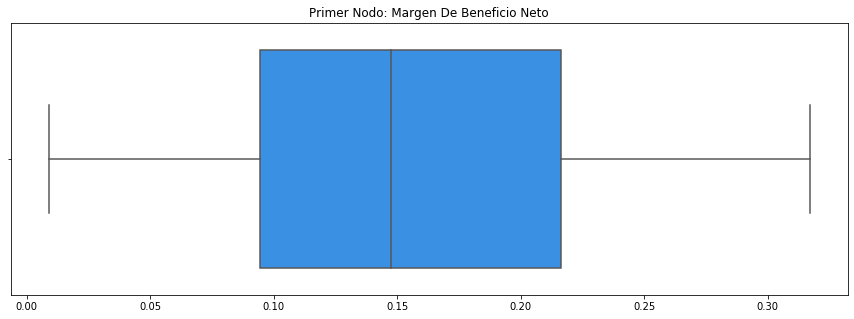

In [3]:
data1 = pd.read_excel("Data/MargenNeto.xlsx", index_col = [0])
data1 = dataframeToArray(data1)

boxplot(data1, (15, 5), "dodgerblue", "Primer Nodo: Margen De Beneficio Neto")

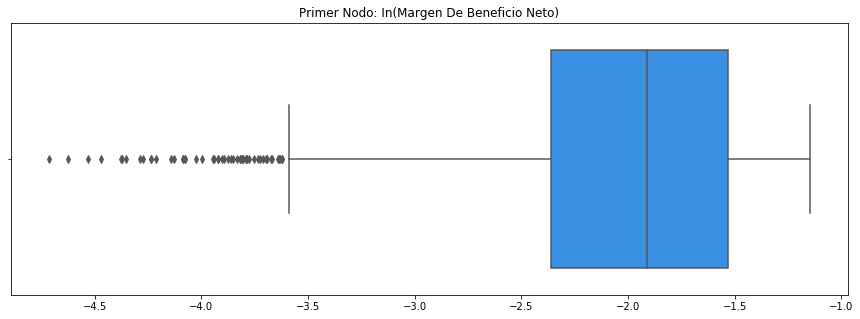

In [4]:
boxplot(logTransformation(data1), (15, 5), "dodgerblue", "Primer Nodo: In(Margen De Beneficio Neto)")

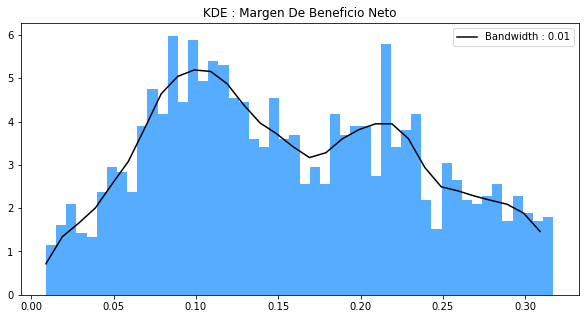

In [5]:
data1_min, data1_max = data1.min(), data1.max()
xgrid1 = np.arange(data1_min, data1_max, 0.01)
f_data1 = kde(data1, np.linspace(0.01, 2, 30), 20, xgrid1, "KDE : Margen De Beneficio Neto", color = ["k", "dodgerblue"]);

### 1.7.2 Segundo Nodo: Ratio Payout

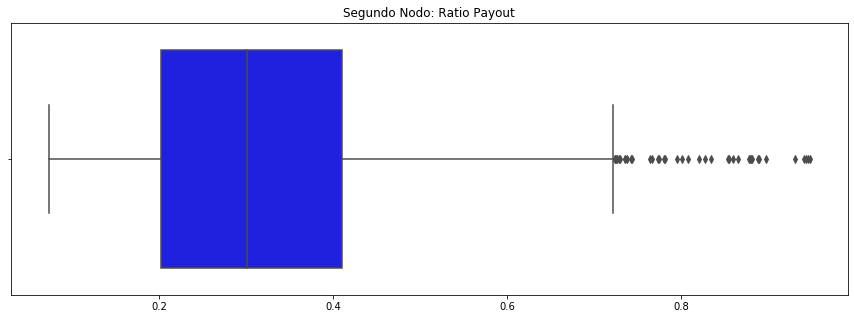

In [7]:
data2 = pd.read_excel("Data/RatioPayout.xlsx", index_col = [0])
data2 = dataframeToArray(data2)

boxplot(data2,(15, 5), "blue", "Segundo Nodo: Ratio Payout")

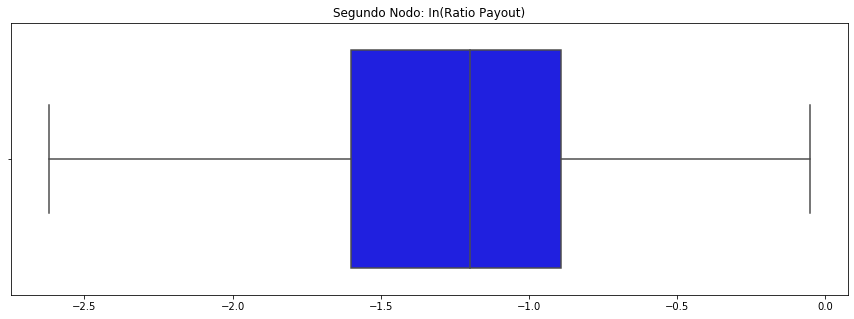

In [8]:
data2_log = logTransformation(data2)
boxplot(data2_log, (15, 5), "blue", "Segundo Nodo: In(Ratio Payout)")

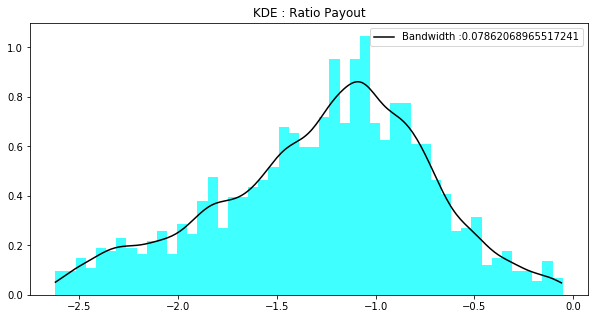

In [9]:
data2_min, data2_max = data2_log.min(), data2_log.max()
xgrid2 = np.arange(data2_min, data2_max, 0.01)
f_data2 = kde(data2_log, np.linspace(0.01, 2, 30), 20, xgrid2, "KDE : Ratio Payout", color = ["k", "aqua"]);

Montecarlo


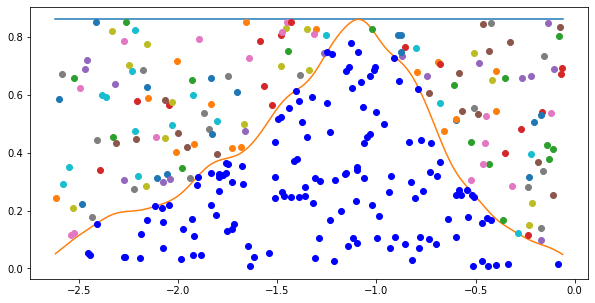

In [10]:
max_f2 = f_data2(optimize.fmin(lambda x : -f_data2(x), 0, disp=False))
t2 = lambda x : np.ones(len(x)) * max_f2

plt.figure(figsize = (10, 5))
plt.plot(xgrid2, t2(xgrid2), label = "t(x)")
plt.plot(xgrid2, f_data2(xgrid2), label = "f(x)")
x1, x2 = acceptanceRejection(f_data2, t2, [data2_min, data2_max], 100, "Montecarlo", plot = True)

## 1.8 Simulación

### 1.8.1 Primer Nodo: Margen De Beneficio Neto

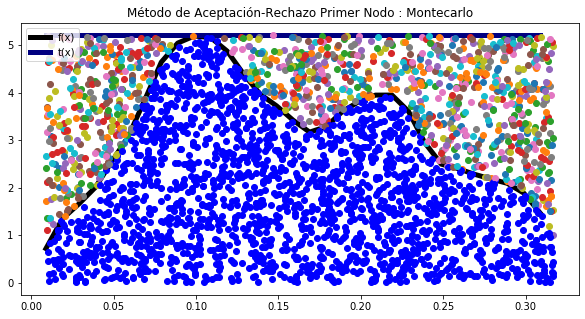

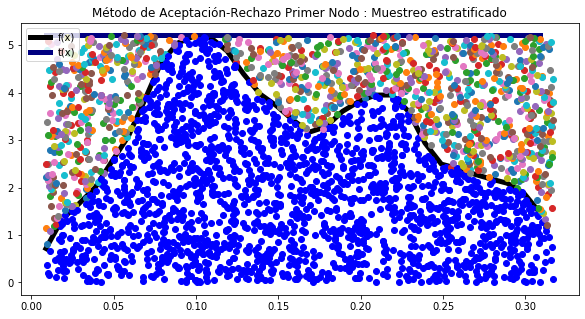

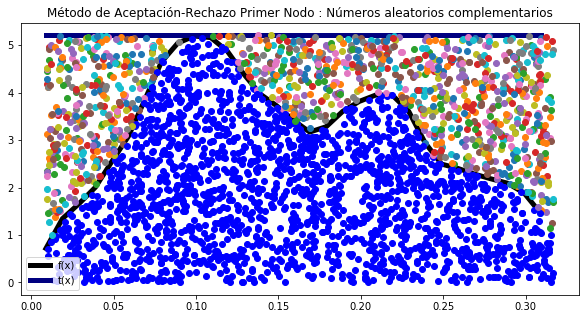

In [6]:
t1 = f_max(f_data1)
methods = ["Montecarlo", "Muestreo estratificado", "Números aleatorios complementarios"]
x_accepted1 = [(acceptanceRejectionPlot(f_data1, t1, xgrid1, "Método de Aceptación-Rechazo Primer Nodo : " + method, (10, 5)), 
  acceptanceRejection(f_data1, t1, [data1_min, data1_max], 1500, method, plot = True)) for method in methods]

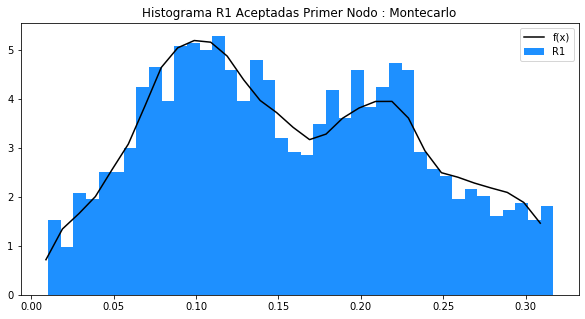

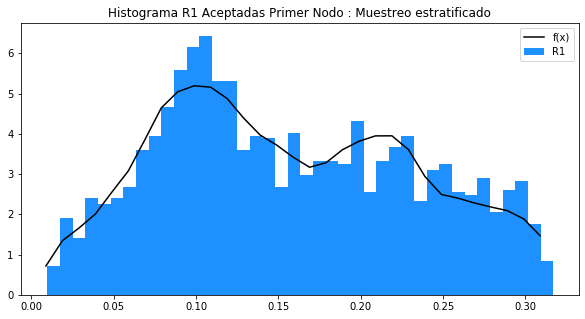

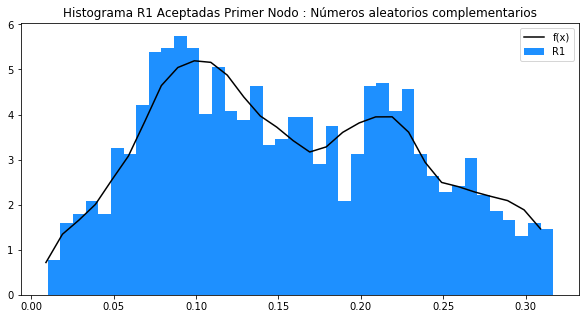

In [7]:
[acceptedR1Plot(x_accepted1[i][1], 40, f_data1, xgrid1, "Histograma R1 Aceptadas Primer Nodo : " + method, (10, 5), 
 ["k", "dodgerblue"]) for i, method in zip(range(len(x_accepted1)), methods)];

### 1.8.2 Segundo Nodo: Ratio Payout

## 1.9 Visualización De Resultados De Simulación

## 1.10 Conclusiones

## 1.11 Referencias Consultadas